In [105]:
import numpy as np
import menzalib as mz
import pylab as pl
from scipy.optimize import curve_fit
from statsmodels.nonparametric.smoothers_lowess import lowess
from numpy.polynomial.polynomial import polyfit
#from scipy.interpolate import interpid

In [155]:
def mass(v):
    mass=0
    for i in range(len(v)): 
        if v[i]>v[mass]: mass=i
    return mass

def lin(x,a,b):
    return a*x + b

def quad(x,a,b,c):
    return c*x**2 + b*x + a
def dquad(x,a,b,c):
    return x*x/2+ b

def wa(y, dy):
    """Weighted average of a list of measurement.
    """
    S = Sy = 0.
    for yi, dyi in zip(y, dy):
        wi = (1./dyi)**2.
        S += wi
        Sy += wi*yi
    q = Sy/S
    dq = (1./S)**0.5
    return q, dq

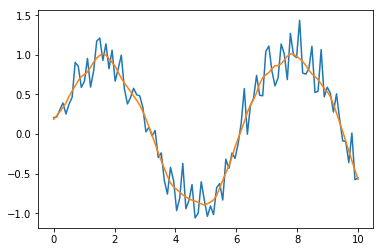

In [107]:


x = np.linspace(0,10,100)
y = np.sin(x) + np.random.normal(size=len(x))*0.2
z = np.transpose(lowess(y, x,frac=0.1))
pl.plot(x,y)
pl.plot(x,z[1])
pl.show()
pl.close()

In [108]:
files=[[0,1,0],
       [2,3,2],
       [4,5,3],
       [6,7,4]]
for i in range(len(files)):
    t1,v1=np.genfromtxt('dati/TEK000'+str(files[i][0])+'.CSV',delimiter=',',unpack='true')[3:5]
    scala1=np.genfromtxt('dati/TEK000'+str(files[i][0])+'.CSV',delimiter=',',unpack='true')[1][11]
    t2,v2=np.genfromtxt('dati/TEK000'+str(files[i][1])+'.CSV',delimiter=',',unpack='true')[3:5]
    scala2=np.genfromtxt('dati/TEK000'+str(files[i][1])+'.CSV',delimiter=',',unpack='true')[1][11]
    v1=v1*10
    t1,t2=(t1-t1[0]),(t2-t2[0])
    
    pl.plot(t1,v1)
    pl.plot(t2,v2*10)
    pl.xlabel('Voltaggio[V]')
    pl.ylabel('Tempo[s]')
    pl.savefig('immagini/voltaggio-tempo_'+str(i)+'.eps',format='eps')
    #pl.show()
    pl.close()
    
    mas=mass(v1)
    x=np.linspace(v1[0],v1.max(),len(v1[:mas]))
    pl.plot(x,v2[:mas])
    pl.ylabel('V_c[V]')
    pl.xlabel('U_a[V]')
    pl.savefig('immagini/corrente-voltaggio_'+str(i)+'.eps',format='eps')
    #pl.show()
    pl.close()

12.92500000000001 9.542134099572346
$13.0$ $\pm$ $10.0$


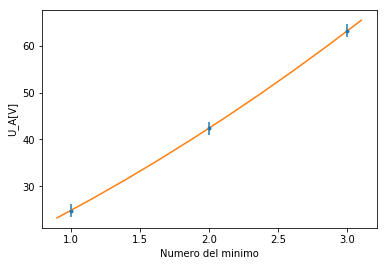

15.325000000000012 10.168692866043664
$15.3$ $\pm$ $10.2$


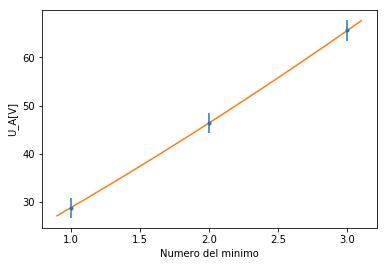

10.924999999999976 9.302431007427575
$11.0$ $\pm$ $9.0$


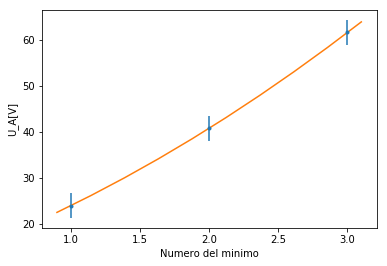

$13.0$ $\pm$ $6.0$


Copia tutto quello che c'è tra le linee
--------------------------
\begin{tabular}{ccc}
\hline
	$U_E$ & $U_A/n$ (massimi) & $U_A/n$ (minimi)\\ 
\hline
	$7.1$ & $17.9$ $\pm$ $0.9$ & $0.9$ $\pm$ $0.9$ \\
	$10.7$ & $19.1$ $\pm$ $0.7$ & $0.7$ $\pm$ $0.7$ \\
	$6.5$ & $18.0$ $\pm$ $1.0$ & $1.0$ $\pm$ $1.0$ \\
\hline
\end{tabular}
--------------------------




In [160]:
U_E = [7.1,10.7,6.5]

Max=([[1.92, 3.60, 5.60],
     [1.92, 3.68, 5.68, 7.84],
     [1.92, 3.58, 5.76]])

Min=([[2.48, 4.24, 6.32],
     [2.88, 4.64, 6.56],
     [2.40, 4.08, 6.16]])


poptM=np.empty([len(U_E),2])
errM=np.empty([len(U_E),2])
poptm=np.empty([len(U_E),2])
errm=np.empty([len(U_E),2])

fond=np.empty(3)
dfond=np.empty(3)
E,dE=np.zeros(len(U_E)),np.zeros(len(U_E))

for i in range (len(U_E)):
    #calcolo errori
    x=np.arange(1,len(Max[i])+1)
    dMax=mz.dVosc(Max[i])*10
    for j in range(len(Max[i])): Max[i][j]= Max[i][j]*10
    pl.errorbar(x,Max[i],dMax[i],fmt='.')
    
    #fit
    popt,pcov=curve_fit(lin,x,Max[i],sigma=dMax)
    poptM[i],errM[i]=popt,np.sqrt(np.diag(pcov))
    x=np.linspace(0.9,len(Max[i])+0.1,10)
    
    #plot
    pl.plot(x,lin(x,*popt))
    pl.xlabel('Numero del massimo')
    pl.ylabel('U_A[V]')
    #pl.title('U_E='+str(U_E[i])+'V')
    #pl.savefig('immagini/Massimi_'+str(i)+'.eps',format='eps')
    #pl.show()
    pl.close()
    
    ##Minimi
    #errori
    x=np.arange(1,len(Min[i])+1)
    dMin=mz.dVosc(Min[i],scala=1)*10
    for j in range(len(Min[i])): Min[i][j]=Min[i][j]*10
    pl.errorbar(x,Min[i],dMin[i],fmt='.')
    
    #fit
    popt,pcov=curve_fit(quad,x,Min[i],sigma=dMin,absolute_sigma='True')
    E[i]=dquad(1/2,*popt)
    cov=np.zeros([4,4])
    for j in range(1,4):
        for k in range(1,4):
            cov[j][k]=pcov[j-1][k-1]
    dE[i]=np.sqrt(mz.dy(dquad,[1/2,*popt],cov))
    print(E[i],dE[i])
    print(mz.ne_tex(E[i],dE[i]))
    
    x=np.linspace(0.9,len(Min[i])+0.1,10)
    pl.plot(x,quad(x,*popt))
    pl.xlabel('Numero del minimo')
    pl.ylabel('U_A[V]')
    #pl.title('U_E='+str(U_E[i])+'V')
    #pl.savefig('immagini/Minimi_'+str(i)+'.eps',format='eps')
    pl.savefig('immagini/Minimi-quad_'+str(i)+'.eps',format='eps')
    pl.show()
    pl.close()

x,dx=wa(E,dE)
print(mz.ne_tex(x,dx))

#print(np.average([17.2,20.6,17.1]))
#print(np.average([13.1,15.3,11.3]))
poptm=np.transpose(poptm)
poptM=np.transpose(poptM)
errm=np.transpose(errm)
errM=np.transpose(errM)
tit='$U_E$ & $U_A/n$ (massimi) & $U_A/n$ (minimi)'
mz.mat_tex([mz.ns_tex(U_E),mz.ne_tex(poptM[0],errM[0]),mz.ne_tex(poptm[0],errm[0])],titolo=tit)

$16.4$ $\pm$ $0.5$